## Практическая задача: Цветовая сегментация кожи на изображении

В этом примере мы построим ваш первый классификатор с использованием библиотеки scikit-learn. В качестве данных мы возьмем выборку из UCI Репозитория (www.archive.ics.uci.edu), связанную с задачей сегментации изображений, а точнее - выделением кожи на фотографиях. 

В итоге мы построим классификатор, который по RBG представлению цвета пикселя будет пытаться определить, принадлежит пиксель к участку кожи или нет.

<img src="skin_detection.png" />

Для начала скачаем выборку по следующей ссылке: https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

## Чтение выборки

Давайте посмотрим на выборку и попробуем понять, какой смысл имеют

In [38]:
dataset_path = "Skin_NonSkin.txt"

In [39]:
import pandas as pd
dataset = pd.read_csv(dataset_path, sep='\t', header=None)

In [40]:
dataset

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


In [41]:
y = dataset[3]

In [48]:
y

0         1
1         1
2         1
3         1
4         1
         ..
245052    2
245053    2
245054    2
245055    2
245056    2
Name: 3, Length: 245057, dtype: int64

In [49]:
X

,0,1,2
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119
...,...,...,...
245052,163,162,112
245053,163,162,112
245054,163,162,112
245055,163,162,112


In [42]:
X = dataset[dataset.columns[:-1]]

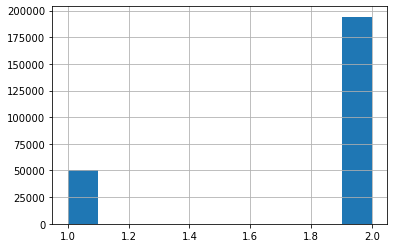

In [52]:
y.hist()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
?train_test_split

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier()

In [54]:
predicted = model.predict(X_test)
print(predicted[:100])

[2 2 1 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 1 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 1 2 1 2]


In [53]:
float(sum(y_test == predicted))/X_test.shape[0]

0.999494001469028

## Чтение и обработка изображения

Для работы с графиками и изображениями в Python есть библиотека Matplotlib. На сайте библиотеки www.matplotlib.org описан API и есть большое количество примеров в разделе gallery. При необходимости построить график можно зайти в галерею, найти визуально картинку, наиболее похожую на нужную и посмотреть код.

Но сейчас мы воспользуемся matplotlib для работы с изображением, на котором хотим найти участки кожи. Для начала считаем изображение:

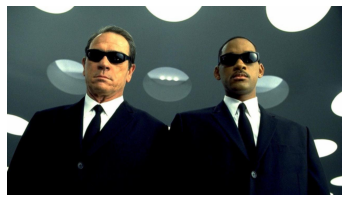

In [56]:
%matplotlib inline 
# чтобы изображения выводились прямо в ipython notebook, а не в отдельном окне


import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

image_path = "mib.jpeg"

image_file = open(image_path, 'rb')
image = plt.imread(image_file)

plt.imshow(image)
plt.axis('off') # clear x- and y-axes
plt.show()

Посмотрим, в каком формате хранится изображение в переменой image:

In [63]:
print(type(image))

<class 'numpy.ndarray'>


Поскольку это массив, попробуем вывести несколько его первых элементов:

In [58]:
print(image[:3])

[[[56 80 82]
  [54 78 80]
  [55 79 81]
  ...
  [12 28 41]
  [11 27 40]
  [11 27 40]]

 [[59 83 85]
  [57 81 83]
  [58 82 84]
  ...
  [12 28 41]
  [11 27 40]
  [10 26 39]]

 [[61 85 87]
  [58 82 84]
  [58 82 84]
  ...
  [12 28 41]
  [10 26 39]
  [ 9 25 38]]]


Похоже на массив строк пикселей. Каждая строка - массив пикселей, а пиксель - массив из трех чисел - RGB представления цвета пикселя.

Обучим наш классификатор на всей обучающей выборке и прогоним классификатор по всем пикселям изображения, заменяя пиксели кожи на ярко зелёные:

In [59]:
model.fit(X, y)

KNeighborsClassifier()

In [67]:
type(image[2])

numpy.ndarray

In [99]:
from copy import deepcopy

image_copy = deepcopy(image)

In [100]:
image_copy[2, 3, 0] = 0

In [101]:
for i, line in enumerate(image):
    classes = model.predict([x[::-1] for x in line]) # predict принимает список объектов
    for j, ans in enumerate(classes):
        if ans == 1:
            image_copy[i, j, 0] = image_copy[i, j, 2] = 0
            image_copy[i, j, 1] = 255

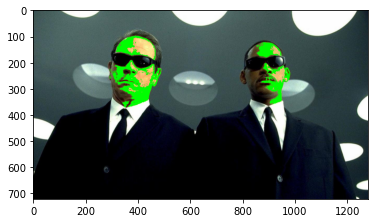

In [102]:
plt.imshow(image_copy)
plt.show()

Не правда ли, какой-то подозрительный результат?

In [76]:
values = X.values
values

array([[ 74,  85, 123],
       [ 73,  84, 122],
       [ 72,  83, 121],
       ...,
       [163, 162, 112],
       [163, 162, 112],
       [255, 255, 255]], dtype=int64)

In [77]:
skin = values[y == 1]
skin

array([[ 74,  85, 123],
       [ 73,  84, 122],
       [ 72,  83, 121],
       ...,
       [ 95, 132, 182],
       [ 92, 132, 181],
       [ 94, 131, 181]], dtype=int64)

In [79]:
noskin = values[y == 2]
noskin

array([[198, 198, 158],
       [198, 198, 158],
       [198, 198, 158],
       ...,
       [163, 162, 112],
       [163, 162, 112],
       [255, 255, 255]], dtype=int64)

In [80]:
def make_image(array, width=100):
    img = [array[width * i: width * i + width] for i in range(0, int(len(array) / width))]
    return img

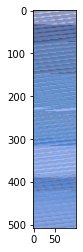

In [84]:
plt.imshow(make_image(skin))

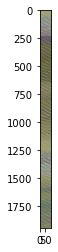

In [85]:
plt.imshow(make_image(noskin))

## Семинарское задание

1. Выяснить, почему на изображении не выделились участки кожи и исправить ситуацию. Подсказка: читайте документацию библиотек.
1. Сравнить качество на отложенной выборке при разном количестве соседей k в kNN (от 1 до 10) и при разных весах во взвешенной версии kNN (см. документацию scikit-learn). Построить график зависимости качества от k.
1. С помощью matplotlib построить трёхмерную визуализацию выборки.

## Полезные материалы

Неплохая презенташка про numpy, scipy, matplotlib: http://mit.spbau.ru/files/scipy.pdf